In [19]:
# Logistic regression
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [20]:
# loading the file into a dataframe
df = pd.read_csv('df_with_dummies_reduced.csv', index_col=0)
df.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,7,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [21]:
y = df.income_code
X = df.drop(columns=['income_code'])

In [22]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [24]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [25]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [27]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.423830


In [29]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [30]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.480277,0.000187,0.480399,0.000131
1,0.463460,0.001449,0.463706,0.001834
2,0.449603,0.001067,0.449927,0.001548
3,0.436858,0.001132,0.437342,0.000803
4,0.426212,0.001560,0.426728,0.001215


In [31]:
print((cv_results["test-rmse-mean"]).tail(1))

99    0.337566
Name: test-rmse-mean, dtype: float64


In [32]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

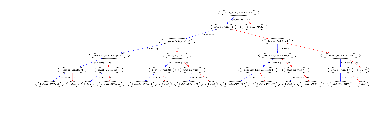

In [33]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

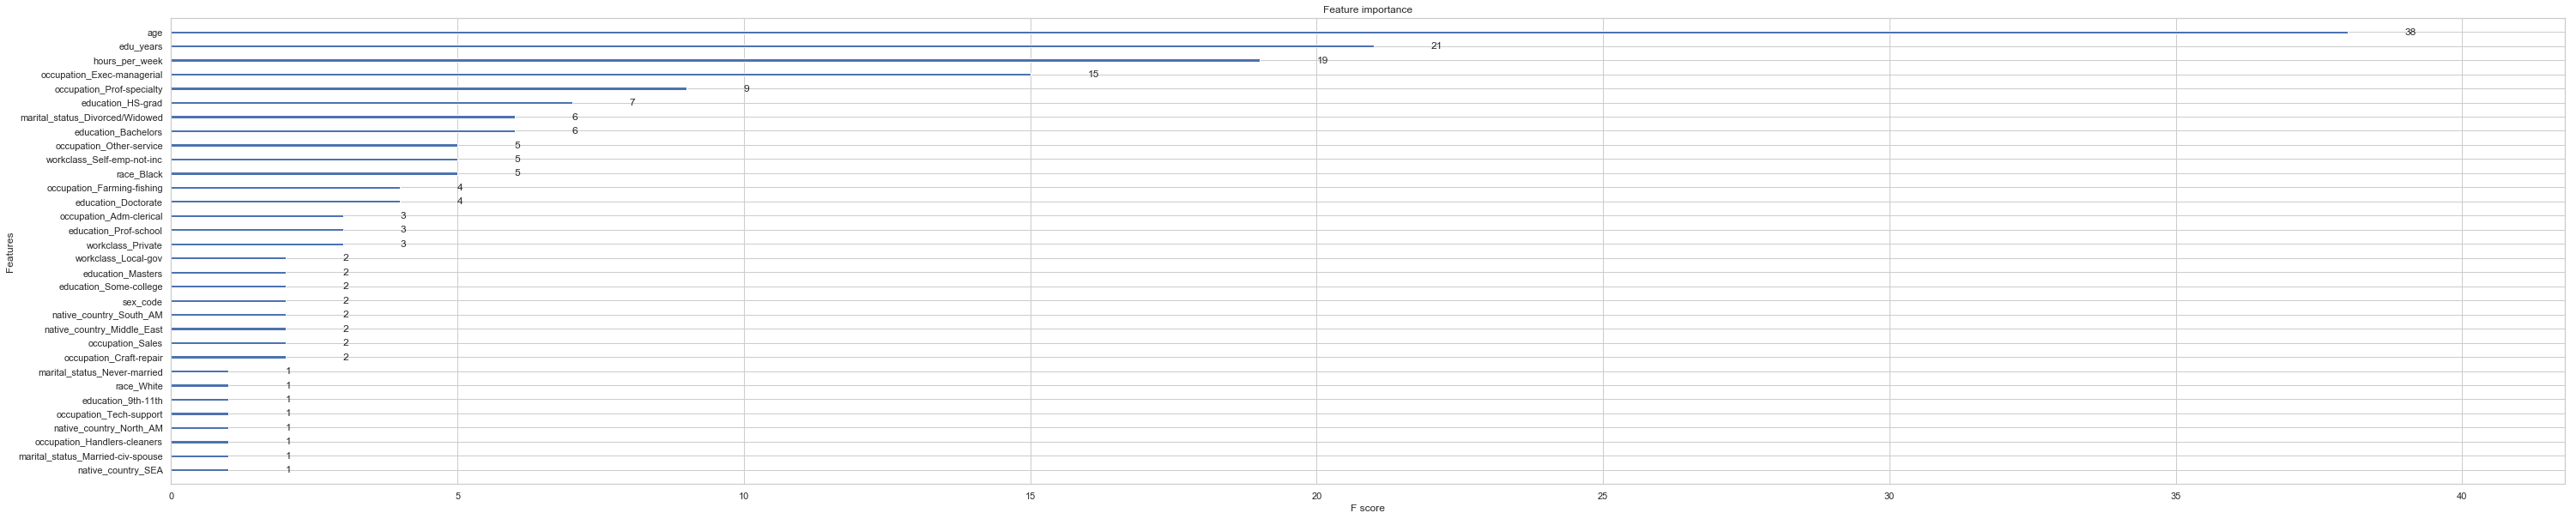

In [34]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [35]:
clf = xgb.XGBClassifier()

In [36]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
training_preds = clf.predict(X_train)

In [38]:
val_preds = clf.predict(X_test)

In [39]:
test_f1 = f1_score(y_test, val_preds)
test_acc = accuracy_score(y_test, val_preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.842886
F1: 0.649410


In [40]:
f1_score(y_test, val_preds)

0.6494099733536354

In [41]:
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 83.85%
Validation accuracy: 84.29%


In [42]:
# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":7, }

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.888869       0.002721       0.875962      0.005335
1        0.893926       0.001971       0.880426      0.005691
2        0.897366       0.002415       0.883239      0.005138
3        0.900100       0.002285       0.884268      0.005233
4        0.902359       0.002088       0.885085      0.004853
0.8850850000000001


In [43]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, val_preds)

In [44]:
f1_score(y_test, val_preds)

0.6494099733536354

Text(0.5, 320.8, 'Predicted label')

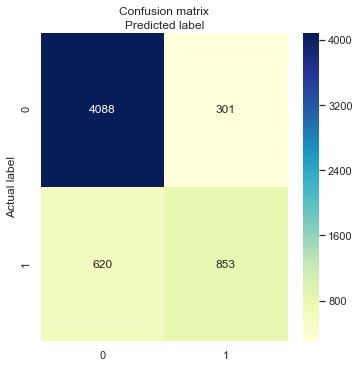

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(c_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Tuning

In [47]:
# Create the DMatrix: housing_dmatrix
income_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3, 'n_estimators':1600}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15, 20, 25, 30]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=income_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics='auc', as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-auc-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","test-auc-mean"]))

   num_boosting_rounds  test-auc-mean
0                    5       0.875451
1                   10       0.882579
2                   15       0.885567
3                   20       0.886382
4                   25       0.887127
5                   30       0.887528


Accuracy: 84.36% --- 50.00 N_estimators


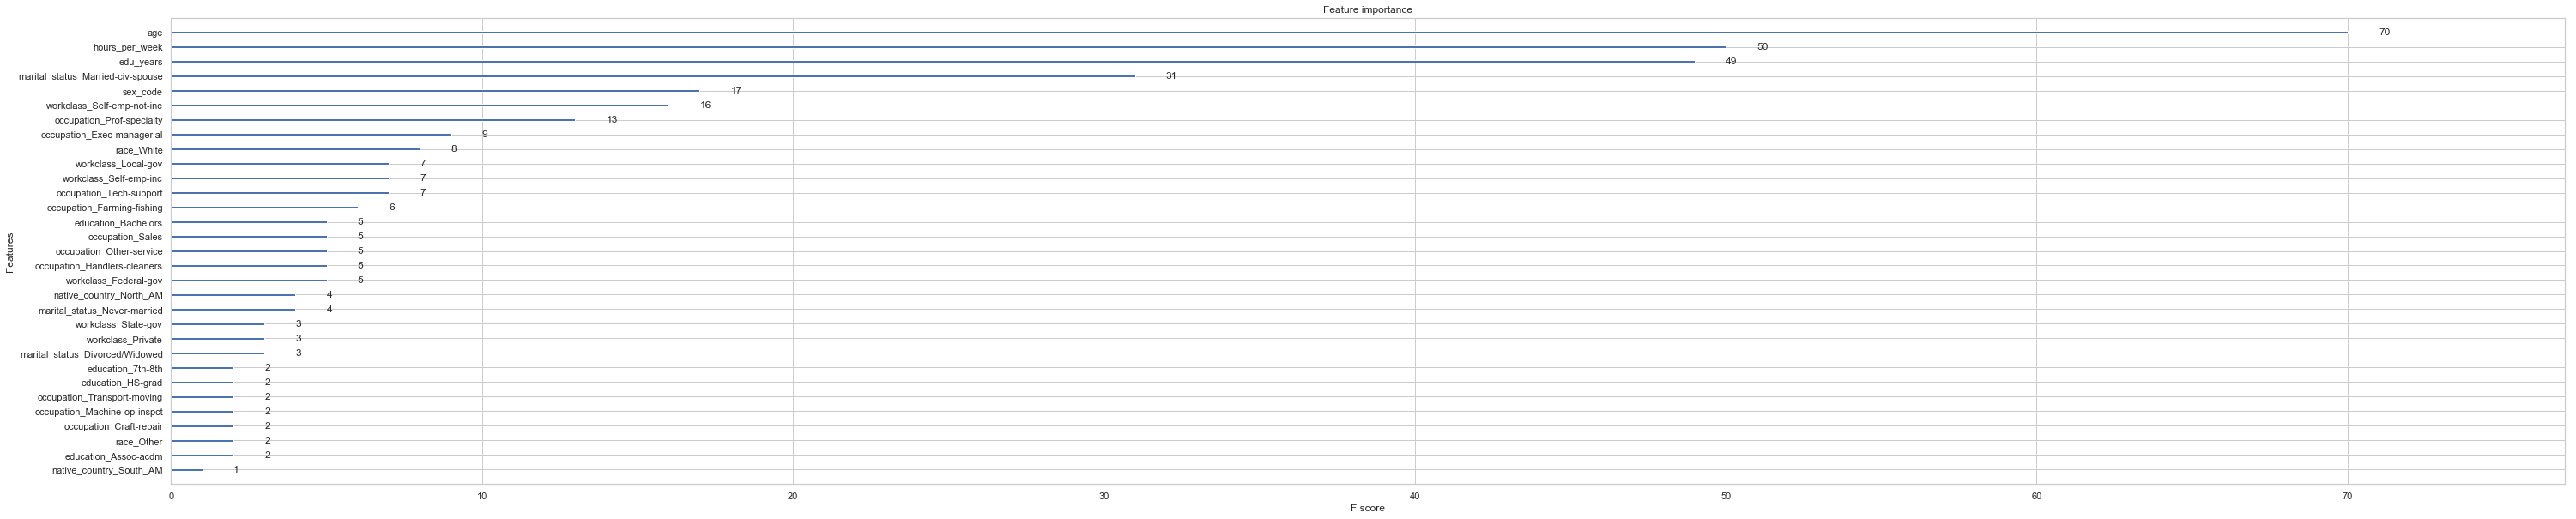

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4078  311]
 [ 606  867]]
Accuracy: 84.68% --- 100.00 N_estimators


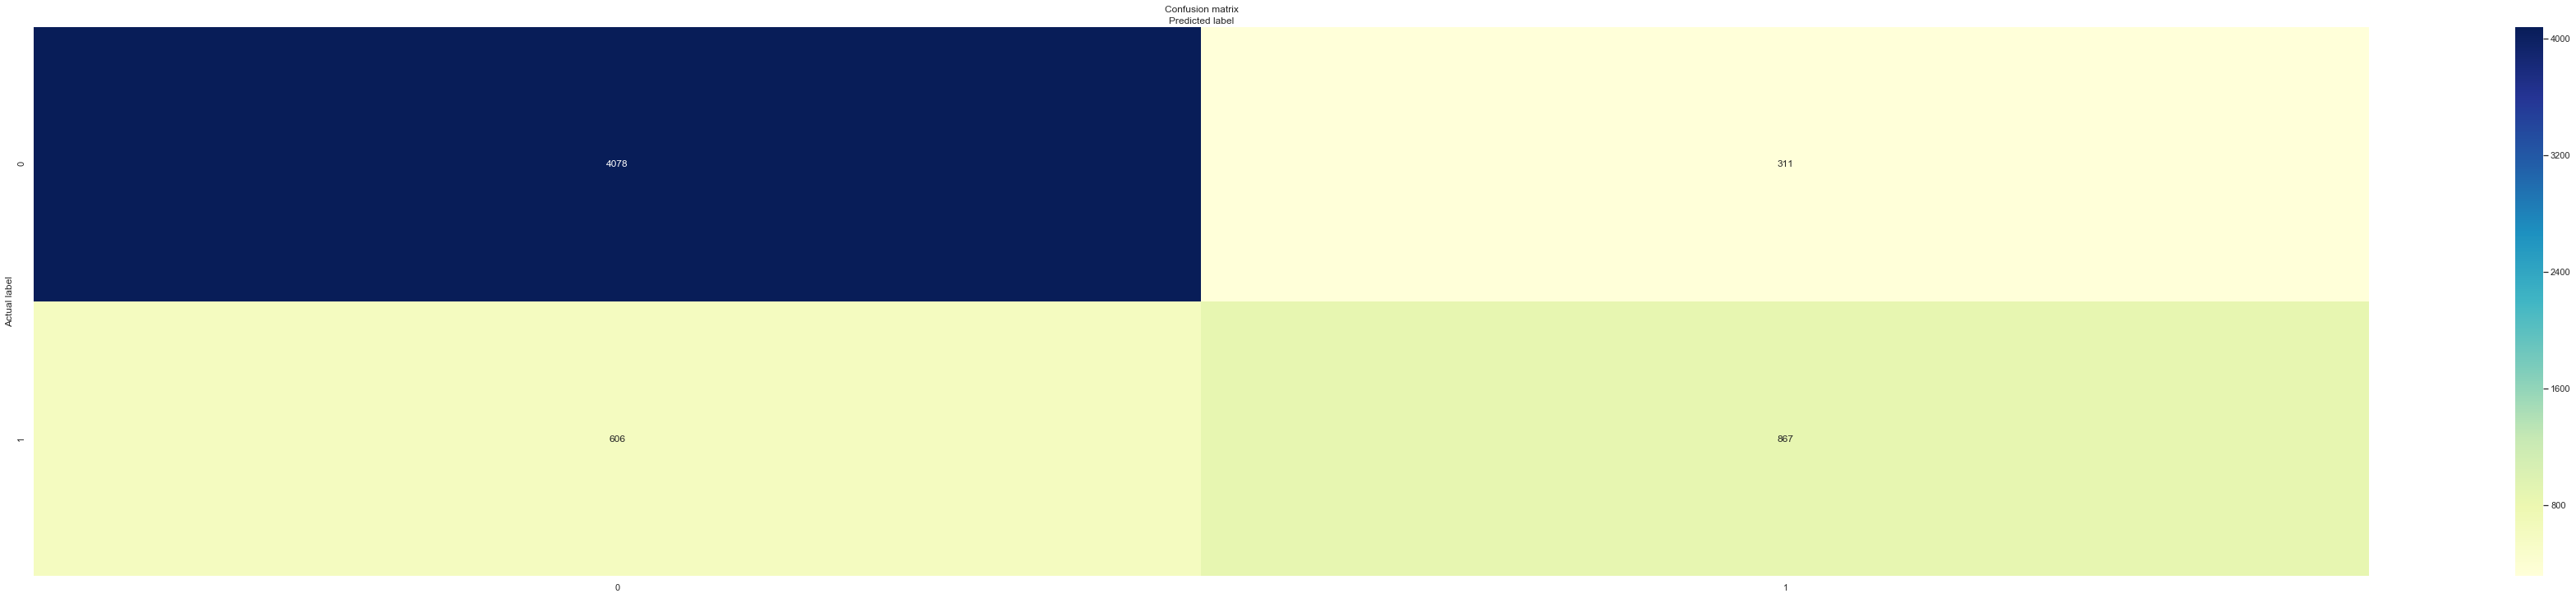

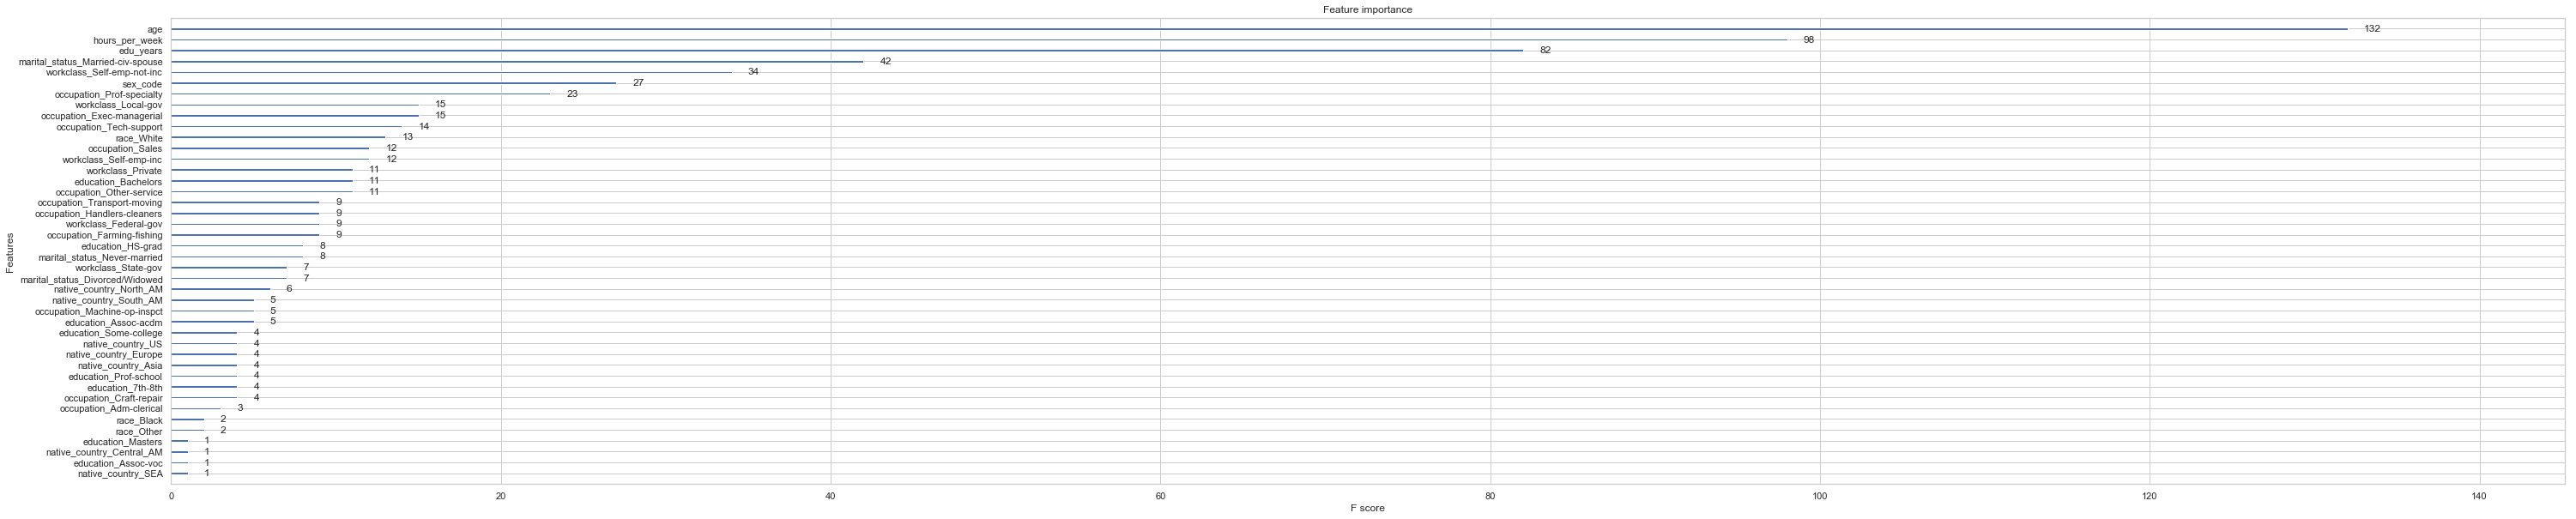

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4062  327]
 [ 571  902]]
Accuracy: 84.72% --- 200.00 N_estimators


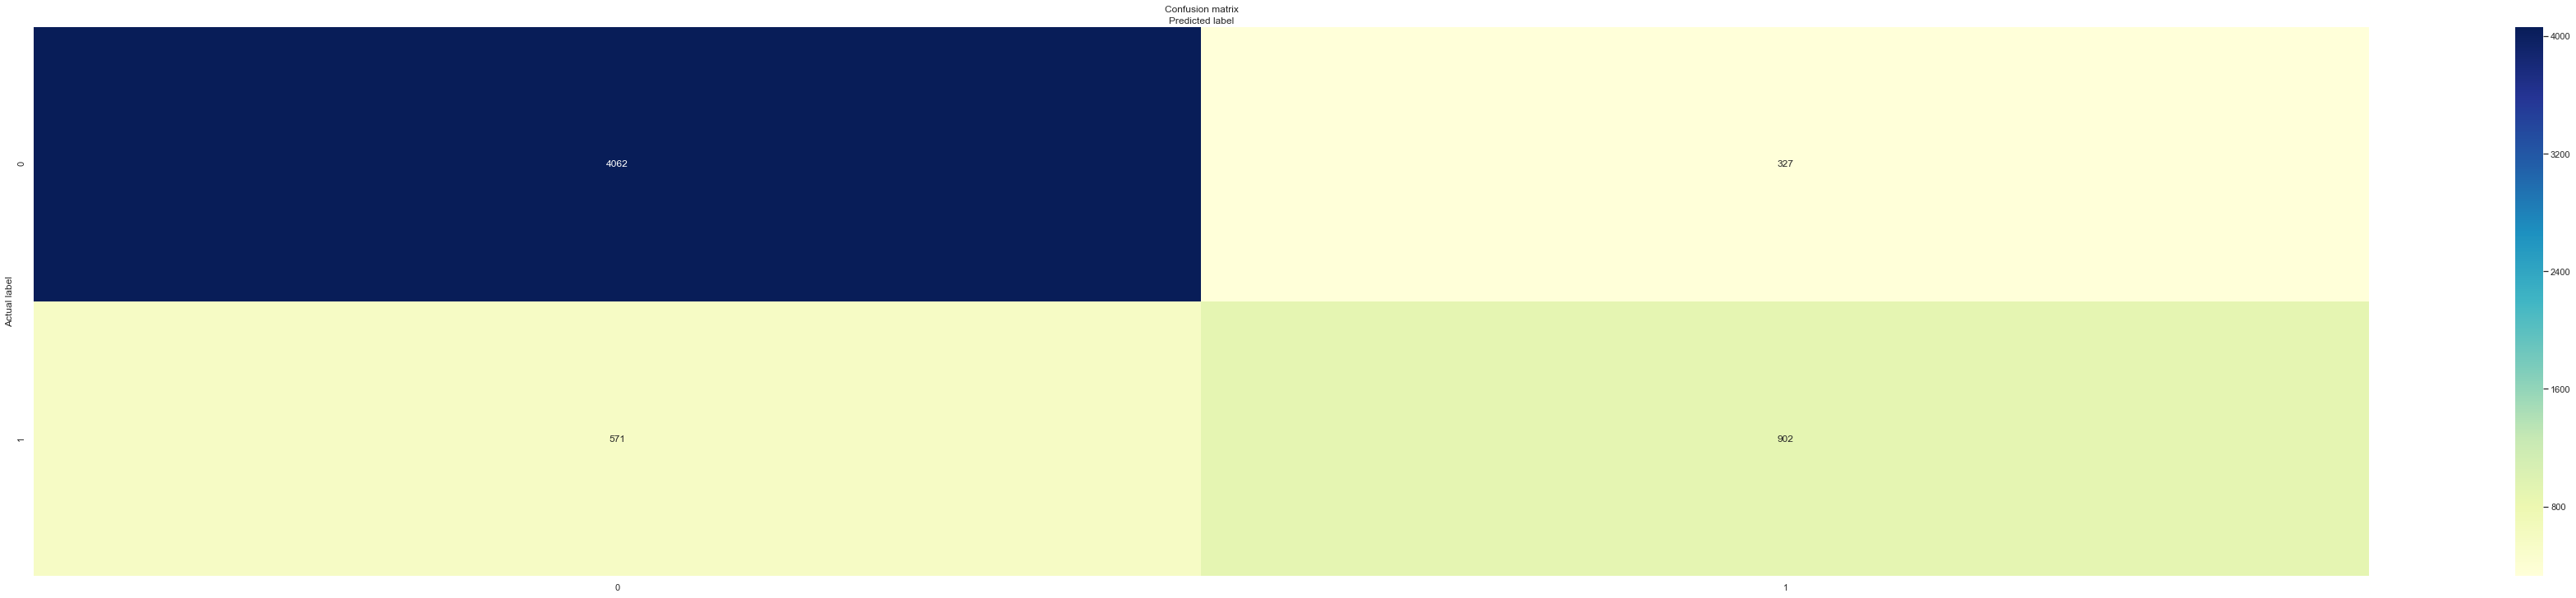

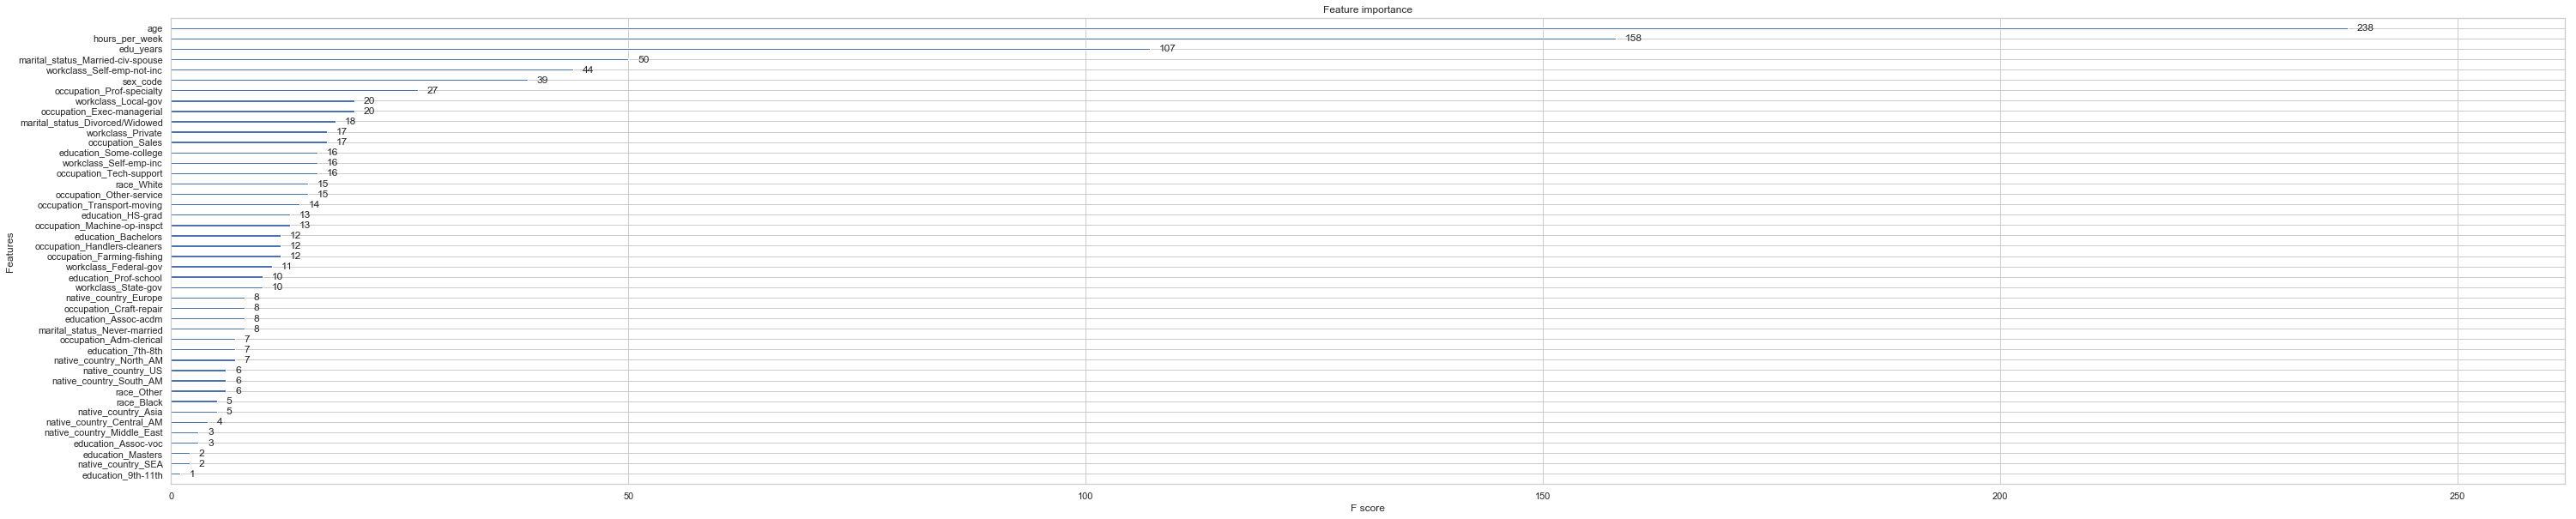

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4067  322]
 [ 574  899]]
Accuracy: 84.72% --- 400.00 N_estimators


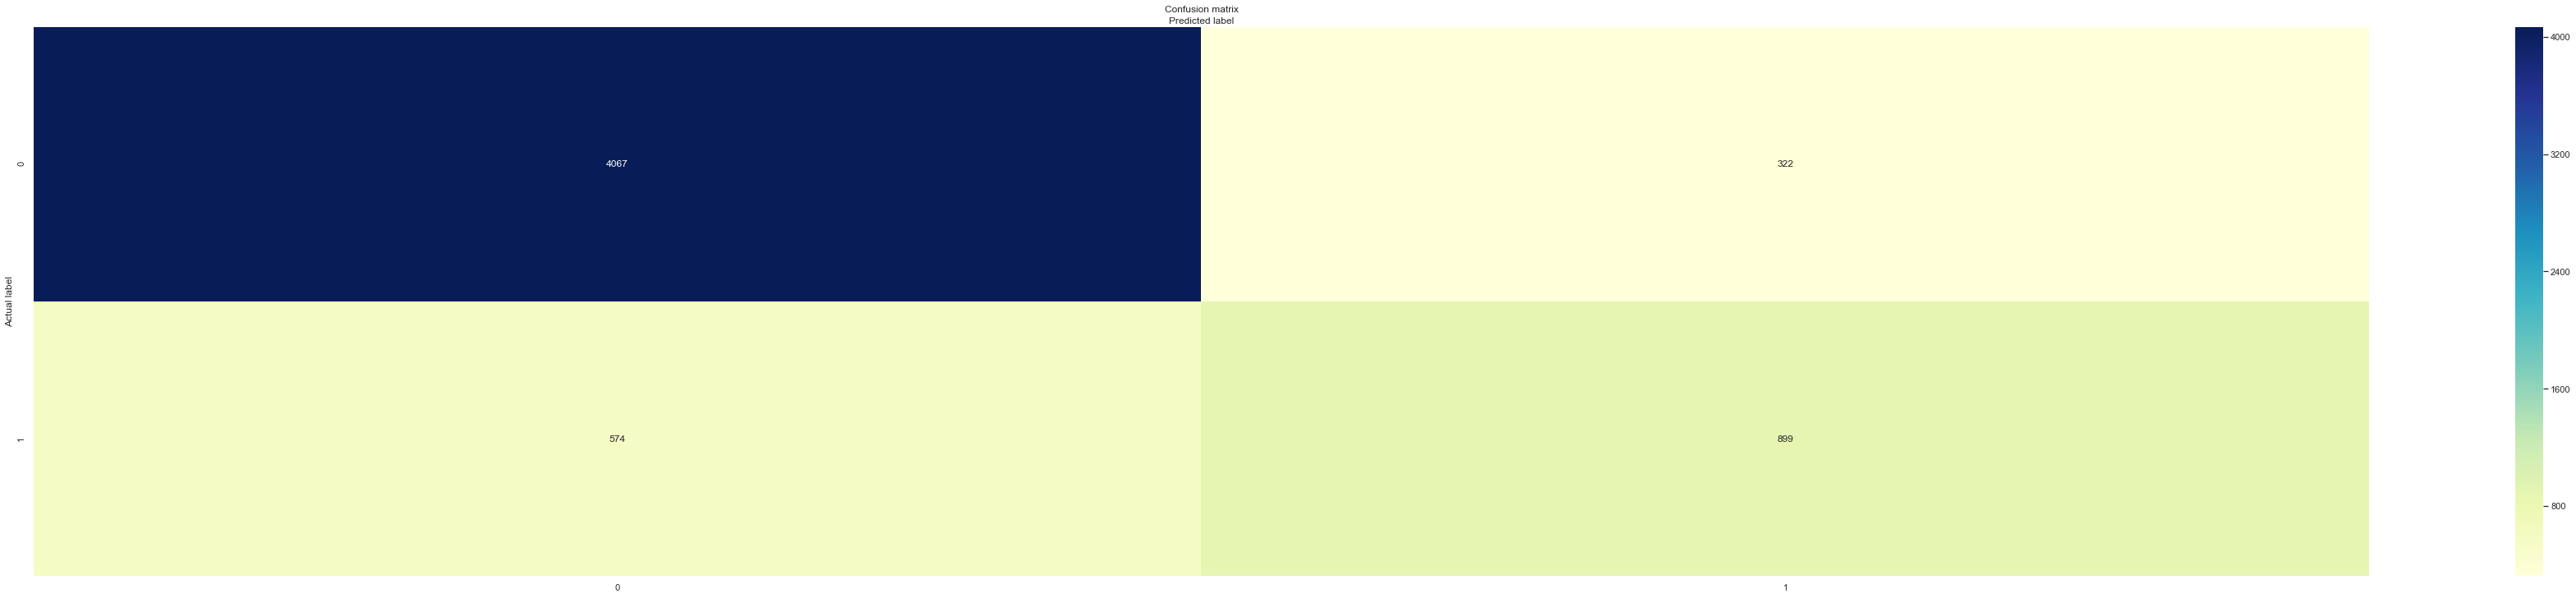

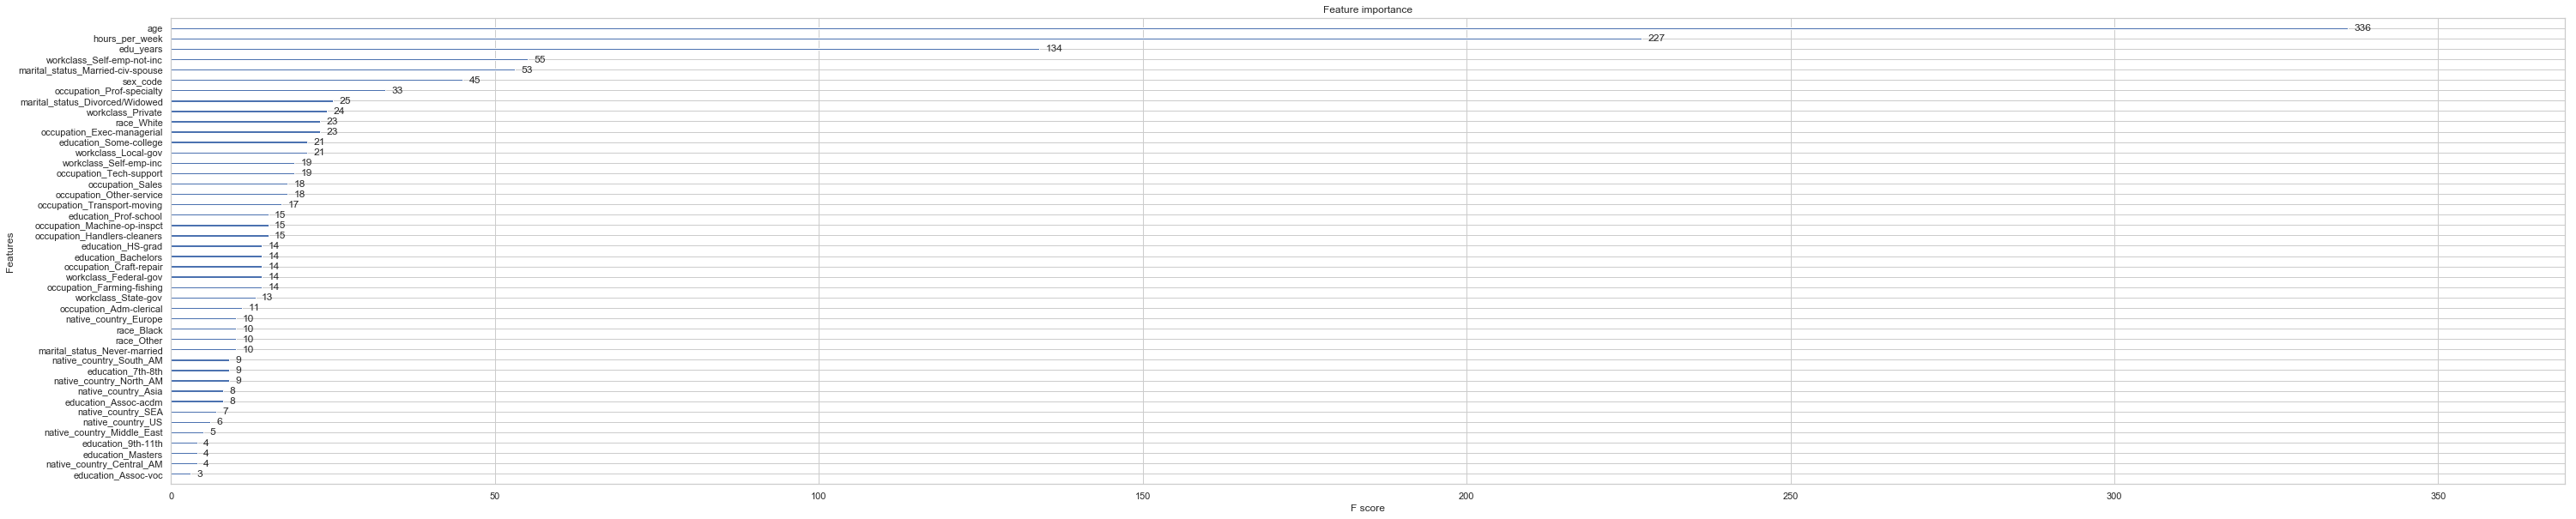

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4067  322]
 [ 574  899]]
Accuracy: 84.78% --- 800.00 N_estimators


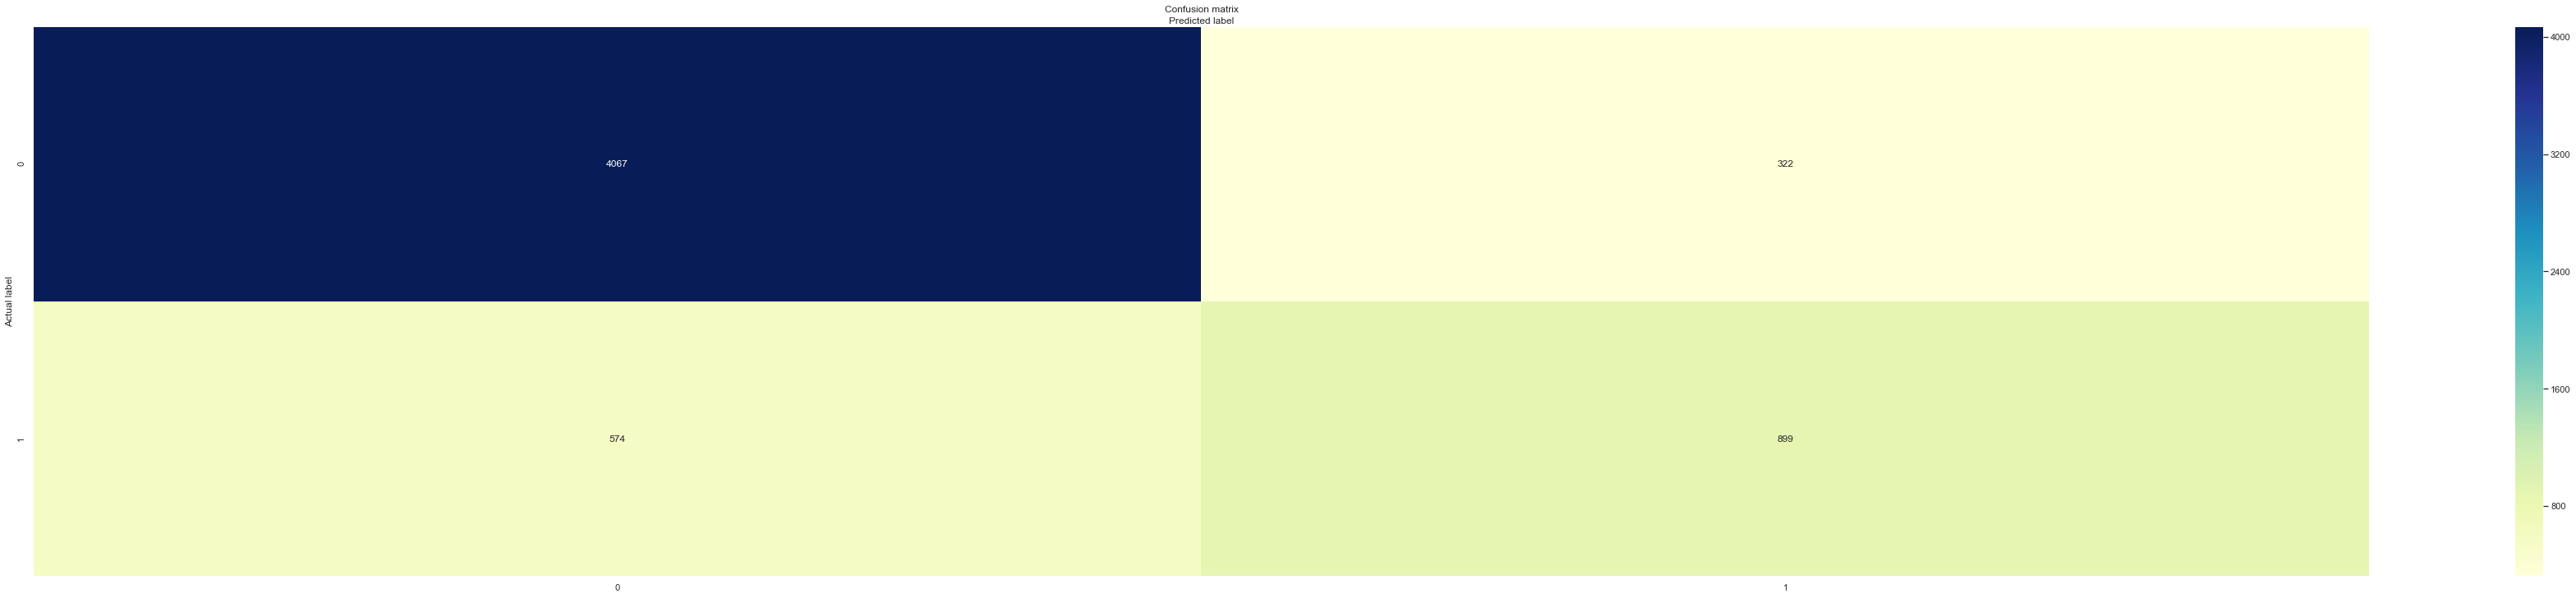

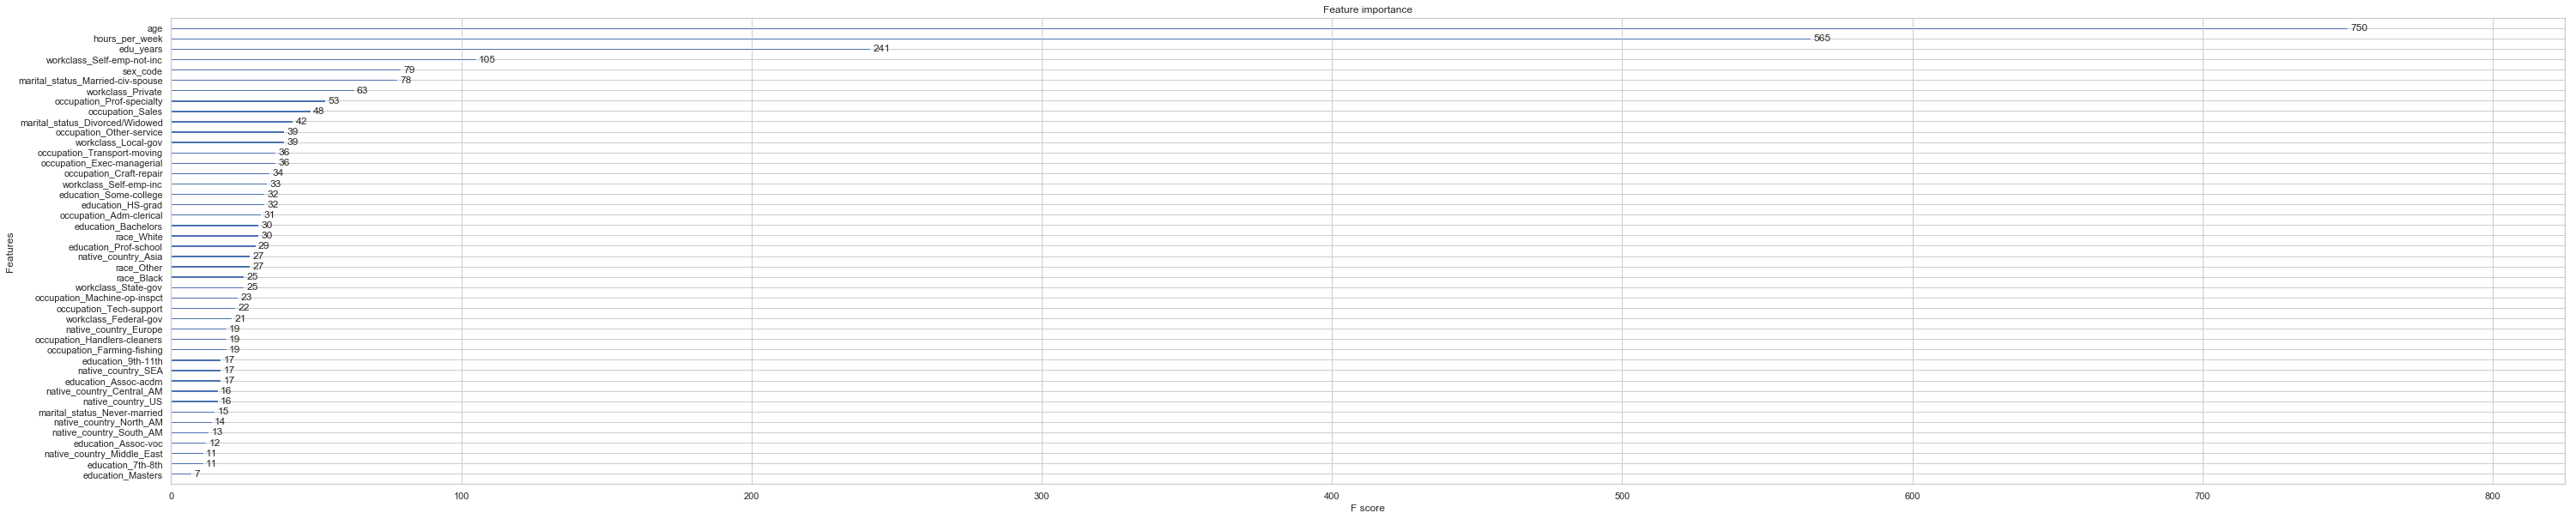

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4056  333]
 [ 559  914]]
Accuracy: 84.78% --- 1600.00 N_estimators


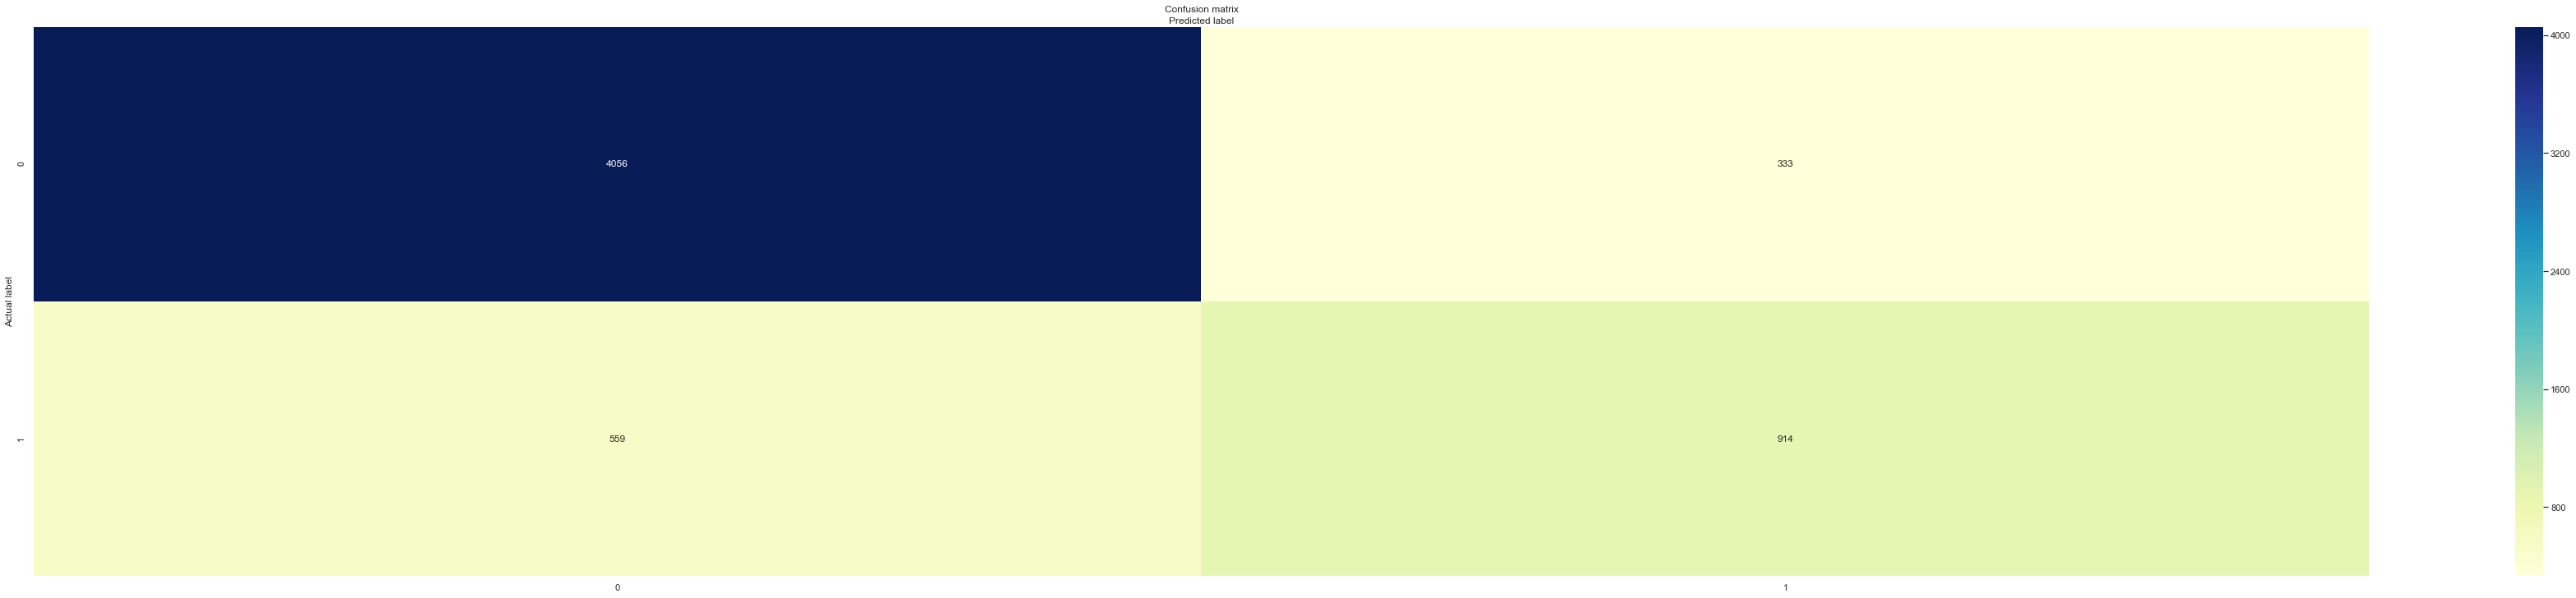

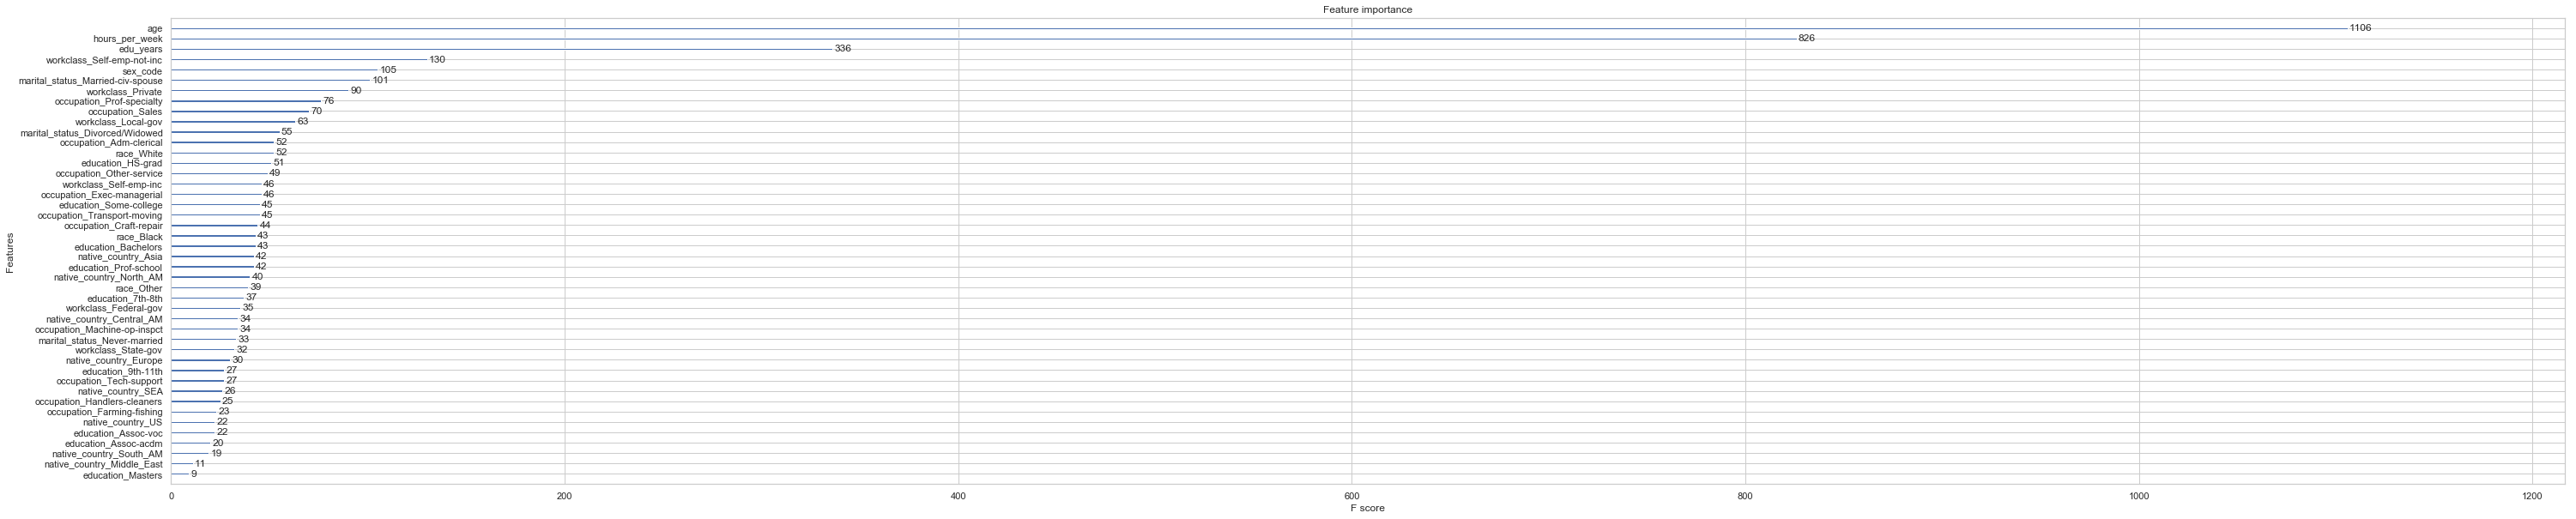

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>
[[4056  333]
 [ 559  914]]


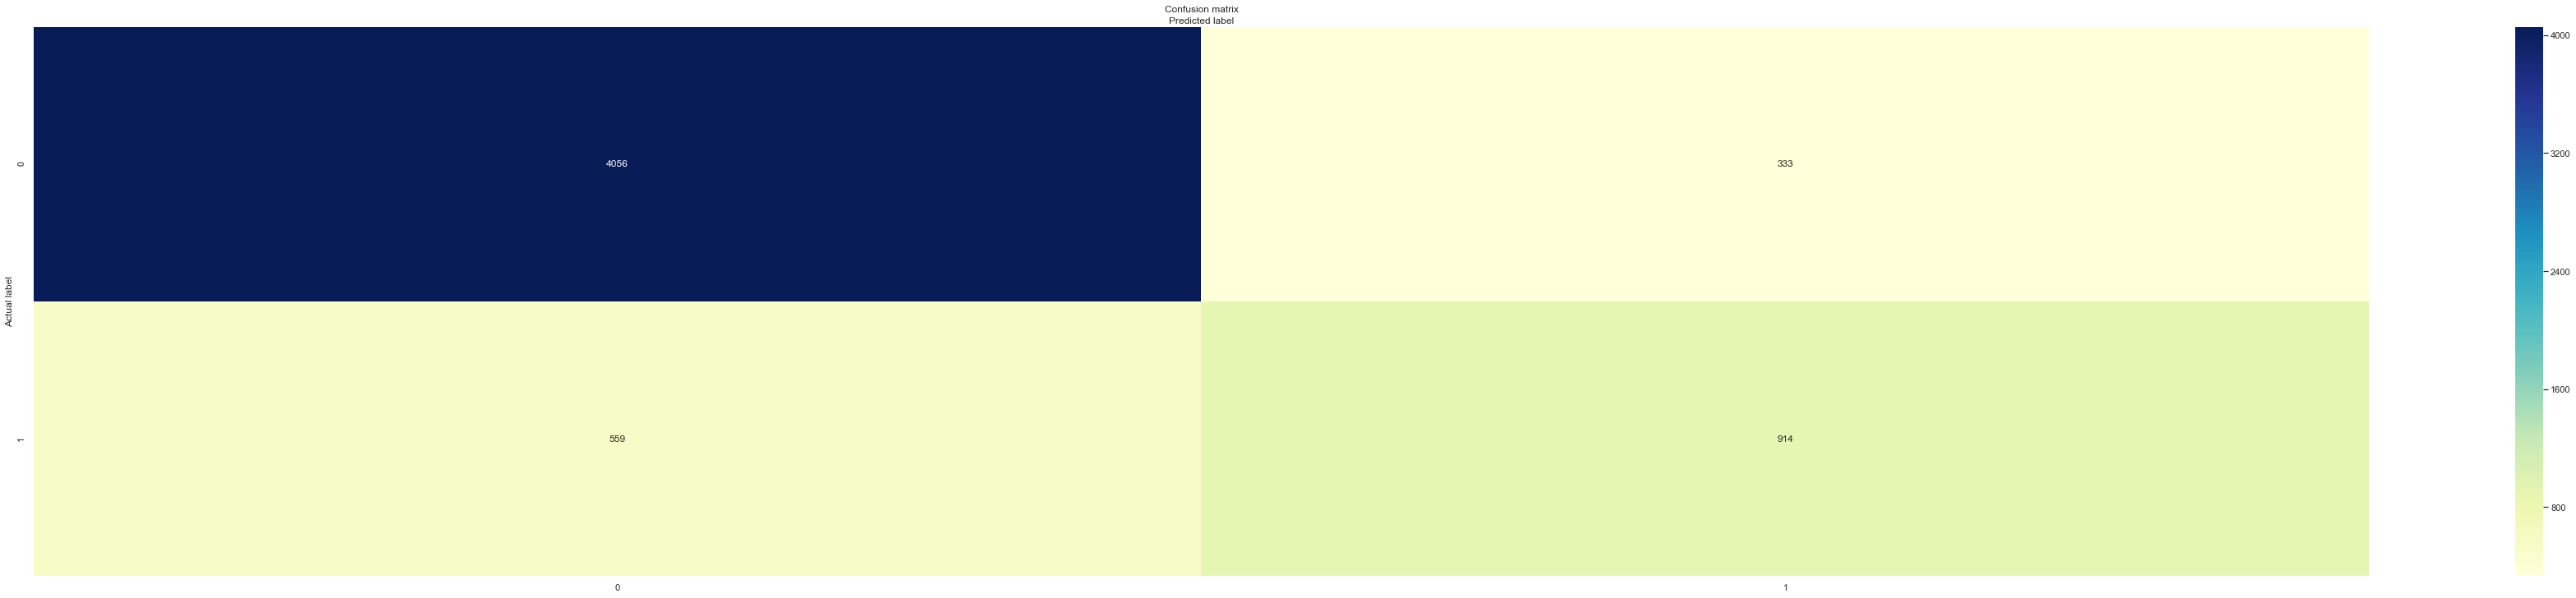

In [142]:
eval_set=[(X_test,y_test)]
for i in [50,100,200,400,800,1600]:
    xgb_model = XGBClassifier(n_estimators=i,learning_rate=0.2,max_depth=3).fit(X_train,y_train,early_stopping_rounds=i-i*.75,eval_set=eval_set, verbose=False)
    results = xgb_model.predict(X_test)
    predictions = [round(value) for value in results]
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%% --- %.2f N_estimators" % (accuracy * 100.0,i))
    
    xgb.plot_importance(xgb_model)
    plt.rcParams['figure.figsize'] = [50, 10]
    plt.show()
    
    print(xgb_model.get_params)
    print(confusion_matrix(y_test, predictions))
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
Best results:

Accuracy: 84.36% --- 50.00 N_estimators
Accuracy: 84.68% --- 100.00 N_estimators
Accuracy: 84.72% --- 200.00 N_estimators
Accuracy: 84.72% --- 250.00 N_estimators
Accuracy: 84.72% --- 400.00 N_estimators
Accuracy: 84.78% --- 800.00 N_estimators
Accuracy: 84.78% --- 1600.00 N_estimators